In [53]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [54]:
reviews=pd.read_csv('extract_reviews.csv')
reviews

stars                                            comment
0     5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    I have well resear...
1     5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    I have well resear...
2     5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    I have well resear...
3     5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Delivery was on ti...
4     4.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    It’s a cute collec...
...                  ...                                                ...
1195  5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    I really liked the...
1196  5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    I loved the produc...
1197  5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Amazing book for p...
1198  5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    Writing this revie...
1199  5.0 out of 5 stars  \n\n\n\n\n\n\n\n  \n  \n    If you are reading...

[1200 rows x 2 columns]

In [47]:
reviews['comment'] = reviews['comment'].astype(str)

In [48]:
reviews.dtypes

stars      object
comment    object
dtype: object

In [55]:
# remove both the leading and the trailing characters
reviews=[comment.strip() for comment in reviews['comment']] 
# remove empty strings, because they are considered in Python as False
reviews=[comment for comment in reviews if comment] 
reviews[0:10]

['I have well researched many books & concluded to this one.  I got it for 399 from amazon. Colors are just perfect. You might get feeling that books are small in size. But if you carefully research , all board books are of this size.Books are very well designed. Corners are kept rounded to avoid accidental hurting to your baby. Content is well researched as well... What more!',
 'I have well researched many books & concluded to this one.  I got it for 399 from amazon. Colors are just perfect. You might get feeling that books are small in size. But if you carefully research , all board books are of this size.Books are very well designed. Corners are kept rounded to avoid accidental hurting to your baby. Content is well researched as well... What more!',
 'I have well researched many books & concluded to this one.  I got it for 399 from amazon. Colors are just perfect. You might get feeling that books are small in size. But if you carefully research , all board books are of this size.Bo

In [56]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

"I have well researched many books & concluded to this one.  I got it for 399 from amazon. Colors are just perfect. You might get feeling that books are small in size. But if you carefully research , all board books are of this size.Books are very well designed. Corners are kept rounded to avoid accidental hurting to your baby. Content is well researched as well... What more! I have well researched many books & concluded to this one.  I got it for 399 from amazon. Colors are just perfect. You might get feeling that books are small in size. But if you carefully research , all board books are of this size.Books are very well designed. Corners are kept rounded to avoid accidental hurting to your baby. Content is well researched as well... What more! I have well researched many books & concluded to this one.  I got it for 399 from amazon. Colors are just perfect. You might get feeling that books are small in size. But if you carefully research , all board books are of this size.Books are v

In [57]:
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I have well researched many books  concluded to this one  I got it for 399 from amazon Colors are just perfect You might get feeling that books are small in size But if you carefully research  all board books are of this sizeBooks are very well designed Corners are kept rounded to avoid accidental hurting to your baby Content is well researched as well What more I have well researched many books  concluded to this one  I got it for 399 from amazon Colors are just perfect You might get feeling that books are small in size But if you carefully research  all board books are of this sizeBooks are very well designed Corners are kept rounded to avoid accidental hurting to your baby Content is well researched as well What more I have well researched many books  concluded to this one  I got it for 399 from amazon Colors are just perfect You might get feeling that books are small in size But if you carefully research  all board books are of this sizeBooks are very well designed Corners are kep

In [58]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])
len(text_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['I', 'have', 'well', 'researched', 'many', 'books', 'concluded', 'to', 'this', 'one', 'I', 'got', 'it', 'for', '399', 'from', 'amazon', 'Colors', 'are', 'just', 'perfect', 'You', 'might', 'get', 'feeling', 'that', 'books', 'are', 'small', 'in', 'size', 'But', 'if', 'you', 'carefully', 'research', 'all', 'board', 'books', 'are', 'of', 'this', 'sizeBooks', 'are', 'very', 'well', 'designed', 'Corners', 'are', 'kept']


66000

In [59]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['well', 'researched', 'many', 'books', 'concluded', 'one', 'got', '399', 'amazon', 'Colors', 'perfect', 'You', 'might', 'get', 'feeling', 'books', 'small', 'size', 'But', 'carefully', 'research', 'board', 'books', 'sizeBooks', 'well', 'designed', 'Corners', 'kept', 'rounded', 'avoid', 'accidental', 'hurting', 'baby', 'Content', 'well', 'researched', 'well', 'What', 'well', 'researched', 'many', 'books', 'concluded', 'one', 'got', '399', 'amazon', 'Colors', 'perfect', 'You', 'might', 'get', 'feeling', 'books', 'small', 'size', 'But', 'carefully', 'research', 'board', 'books', 'sizeBooks', 'well', 'designed', 'Corners', 'kept', 'rounded', 'avoid', 'accidental', 'hurting', 'baby', 'Content', 'well', 'researched', 'well', 'What', 'well', 'researched', 'many', 'books', 'concluded', 'one', 'got', '399', 'amazon', 'Colors', 'perfect', 'You', 'might', 'get', 'feeling', 'books', 'small', 'size', 'But', 'carefully', 'research', 'board', 'books', 'sizeBooks', 'well', 'designed', 'Corners', 'kept

In [60]:
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['well', 'researched', 'many', 'books', 'concluded', 'one', 'got', '399', 'amazon', 'colors', 'perfect', 'you', 'might', 'get', 'feeling', 'books', 'small', 'size', 'but', 'carefully', 'research', 'board', 'books', 'sizebooks', 'well', 'designed', 'corners', 'kept', 'rounded', 'avoid', 'accidental', 'hurting', 'baby', 'content', 'well', 'researched', 'well', 'what', 'well', 'researched', 'many', 'books', 'concluded', 'one', 'got', '399', 'amazon', 'colors', 'perfect', 'you', 'might', 'get', 'feeling', 'books', 'small', 'size', 'but', 'carefully', 'research', 'board', 'books', 'sizebooks', 'well', 'designed', 'corners', 'kept', 'rounded', 'avoid', 'accidental', 'hurting', 'baby', 'content', 'well', 'researched', 'well', 'what', 'well', 'researched', 'many', 'books', 'concluded', 'one', 'got', '399', 'amazon', 'colors', 'perfect', 'you', 'might', 'get', 'feeling', 'books', 'small', 'size', 'but', 'carefully', 'research', 'board', 'books', 'sizebooks', 'well', 'designed', 'corners', 'kept

In [61]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['well', 'research', 'mani', 'book', 'conclud', 'one', 'got', '399', 'amazon', 'color', 'perfect', 'you', 'might', 'get', 'feel', 'book', 'small', 'size', 'but', 'care', 'research', 'board', 'book', 'sizebook', 'well', 'design', 'corner', 'kept', 'round', 'avoid', 'accident', 'hurt', 'babi', 'content', 'well', 'research', 'well', 'what', 'well', 'research', 'mani', 'book', 'conclud', 'one', 'got', '399', 'amazon', 'color', 'perfect', 'you', 'might', 'get', 'feel', 'book', 'small', 'size', 'but', 'care', 'research', 'board', 'book', 'sizebook', 'well', 'design', 'corner', 'kept', 'round', 'avoid', 'accident', 'hurt', 'babi', 'content', 'well', 'research', 'well', 'what', 'well', 'research', 'mani', 'book', 'conclud', 'one', 'got', '399', 'amazon', 'color', 'perfect', 'you', 'might', 'get', 'feel', 'book', 'small', 'size', 'but', 'care', 'research', 'board', 'book', 'sizebook', 'well', 'design', 'corner', 'kept', 'round', 'avoid', 'accident', 'hurt', 'babi', 'content', 'well', 'research'

In [62]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['well', 'research', 'many', 'book', 'conclude', 'one', 'get', '399', 'amazon', 'color', 'perfect', 'you', 'might', 'get', 'feel', 'book', 'small', 'size', 'but', 'carefully', 'research', 'board', 'book', 'sizebook', 'well', 'design', 'corner', 'keep', 'round', 'avoid', 'accidental', 'hurt', 'baby', 'content', 'well', 'research', 'well', 'what', 'well', 'research', 'many', 'book', 'conclude', 'one', 'get', '399', 'amazon', 'color', 'perfect', 'you', 'might', 'get', 'feel', 'book', 'small', 'size', 'but', 'carefully', 'research', 'board', 'book', 'sizebook', 'well', 'design', 'corner', 'keep', 'round', 'avoid', 'accidental', 'hurt', 'baby', 'content', 'well', 'research', 'well', 'what', 'well', 'research', 'many', 'book', 'conclude', 'one', 'get', '399', 'amazon', 'color', 'perfect', 'you', 'might', 'get', 'feel', 'book', 'small', 'size', 'but', 'carefully', 'research', 'board', 'book', 'sizebook', 'well', 'design', 'corner', 'keep', 'round', 'avoid', 'accidental', 'hurt', 'baby', 'cont

In [68]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['well', 'research', 'many', 'book', 'conclude', 'one', 'get', '399', 'amazon', 'color', 'perfect', 'you', 'might', 'get', 'feel', 'book', 'small', 'size', 'but', 'carefully', 'research', 'board', 'book', 'sizebook', 'well', 'design', 'corner', 'keep', 'round', 'avoid', 'accidental', 'hurt', 'baby', 'content', 'well', 'research', 'well', 'what', 'well', 'research', 'many', 'book', 'conclude', 'one', 'get', '399', 'amazon', 'color', 'perfect', 'you', 'might', 'get', 'feel', 'book', 'small', 'size', 'but', 'carefully', 'research', 'board', 'book', 'sizebook', 'well', 'design', 'corner', 'keep', 'round', 'avoid', 'accidental', 'hurt', 'baby', 'content', 'well', 'research', 'well', 'what', 'well', 'research', 'many', 'book', 'conclude', 'one', 'get', '399', 'amazon', 'color', 'perfect', 'you', 'might', 'get', 'feel', 'book', 'small', 'size', 'but', 'carefully', 'research', 'board', 'book', 'sizebook', 'well', 'design', 'corner', 'keep', 'round', 'avoid', 'accidental', 'hurt', 'baby', 'cont

In [69]:
clean_tweets=' '.join(lemmas)
clean_tweets[0:1000]

"well research many book conclude one get 399 amazon color perfect you might get feel book small size but carefully research board book sizebook well design corner keep round avoid accidental hurt baby content well research well what well research many book conclude one get 399 amazon color perfect you might get feel book small size but carefully research board book sizebook well design corner keep round avoid accidental hurt baby content well research well what well research many book conclude one get 399 amazon color perfect you might get feel book small size but carefully research board book sizebook well design corner keep round avoid accidental hurt baby content well research well what delivery time packaging excellent board books superb quality come card bird box 10 book nice term quality colour go baby ' love ' cute collection ' expexte size book small but still book awesome have 12 leaflet book delivery time packaging excellent board books superb quality come card bird box 10 b

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)
print(cv.vocabulary_)
print(cv.get_feature_names()[150:300])
print(reviewscv.toarray()[150:300])
print(reviewscv.toarray().shape)

{'well': 190, 'research': 148, 'many': 106, 'book': 28, 'conclude': 44, 'one': 125, 'get': 68, '399': 4, 'amazon': 11, 'color': 41, 'perfect': 130, 'you': 198, 'might': 109, 'feel': 64, 'small': 162, 'size': 160, 'but': 32, 'carefully': 36, 'board': 27, 'sizebook': 161, 'design': 54, 'corner': 46, 'keep': 90, 'round': 151, 'avoid': 16, 'accidental': 7, 'hurt': 80, 'baby': 18, 'content': 45, 'what': 191, 'delivery': 53, 'time': 175, 'packaging': 127, 'excellent': 62, 'books': 29, 'superb': 168, 'quality': 141, 'come': 43, 'card': 35, 'bird': 25, 'box': 30, '10': 0, 'nice': 121, 'term': 169, 'colour': 42, 'go': 70, 'love': 105, 'cute': 50, 'collection': 40, 'expexte': 63, 'still': 166, 'awesome': 17, 'have': 74, '12': 1, 'leaflet': 93, 'way': 189, 'child': 38, 'learn': 94, 'because': 21, 'year': 197, 'old': 124, 'need': 120, 'see': 155, 'big': 23, 'picture': 133, 'order': 126, 'understand': 181, 'everything': 61, 'buy': 33, 'individual': 84, 'rather': 142, 'library': 97, 'thishope': 172,

In [64]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(2,3),max_features=100,stop_words=my_stop_words)
bow_matrix_ngram=cv_ngram_range.fit_transform(reviews)
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['board books', 'books rather', 'child learn', 'likes see', 'likes see images', 'literally abused', 'literally abused greater', 'little babies', 'little babies small', 'little buy', 'little buy books', 'llhad literally', 'llhad literally abused', 'loaded excellent', 'loaded excellent set', 'long time', 'long time even', 'lot last', 'lot last six', 'loved product', 'loved product much', 'loved quality', 'loved quality books', 'many books', 'many books concluded', 'many varieties', 'many varieties topics', 'mark content', 'mark content much', 'maybe year', 'maybe year old', 'media could', 'media could loaded', 'old child', 'old daughter', 'old daughter course', 'old every', 'old every thing', 'old son', 'old son back', 'one best', 'one best purchases', 'one buy', 'one buy individual', 'one got', 'one got 399', 'one tip', 'one tip read', 'order understand', 'order understand everything', 'packaging excellent', 'packaging excellent board', 'pages also', 'pages also inside', 'pages engrosse

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(2,3),max_features=100,stop_words=my_stop_words)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(reviews)
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['board books', 'books rather', 'child learn', 'likes see', 'likes see images', 'literally abused', 'literally abused greater', 'little babies', 'little babies small', 'little buy', 'little buy books', 'llhad literally', 'llhad literally abused', 'loaded excellent', 'loaded excellent set', 'long time', 'long time even', 'lot last', 'lot last six', 'loved product', 'loved product much', 'loved quality', 'loved quality books', 'many books', 'many books concluded', 'many varieties', 'many varieties topics', 'mark content', 'mark content much', 'maybe year', 'maybe year old', 'media could', 'media could loaded', 'old child', 'old daughter', 'old daughter course', 'old every', 'old every thing', 'old son', 'old son back', 'one best', 'one best purchases', 'one buy', 'one buy individual', 'one got', 'one got 399', 'one tip', 'one tip read', 'order understand', 'order understand everything', 'packaging excellent', 'packaging excellent board', 'pages also', 'pages also inside', 'pages engrosse

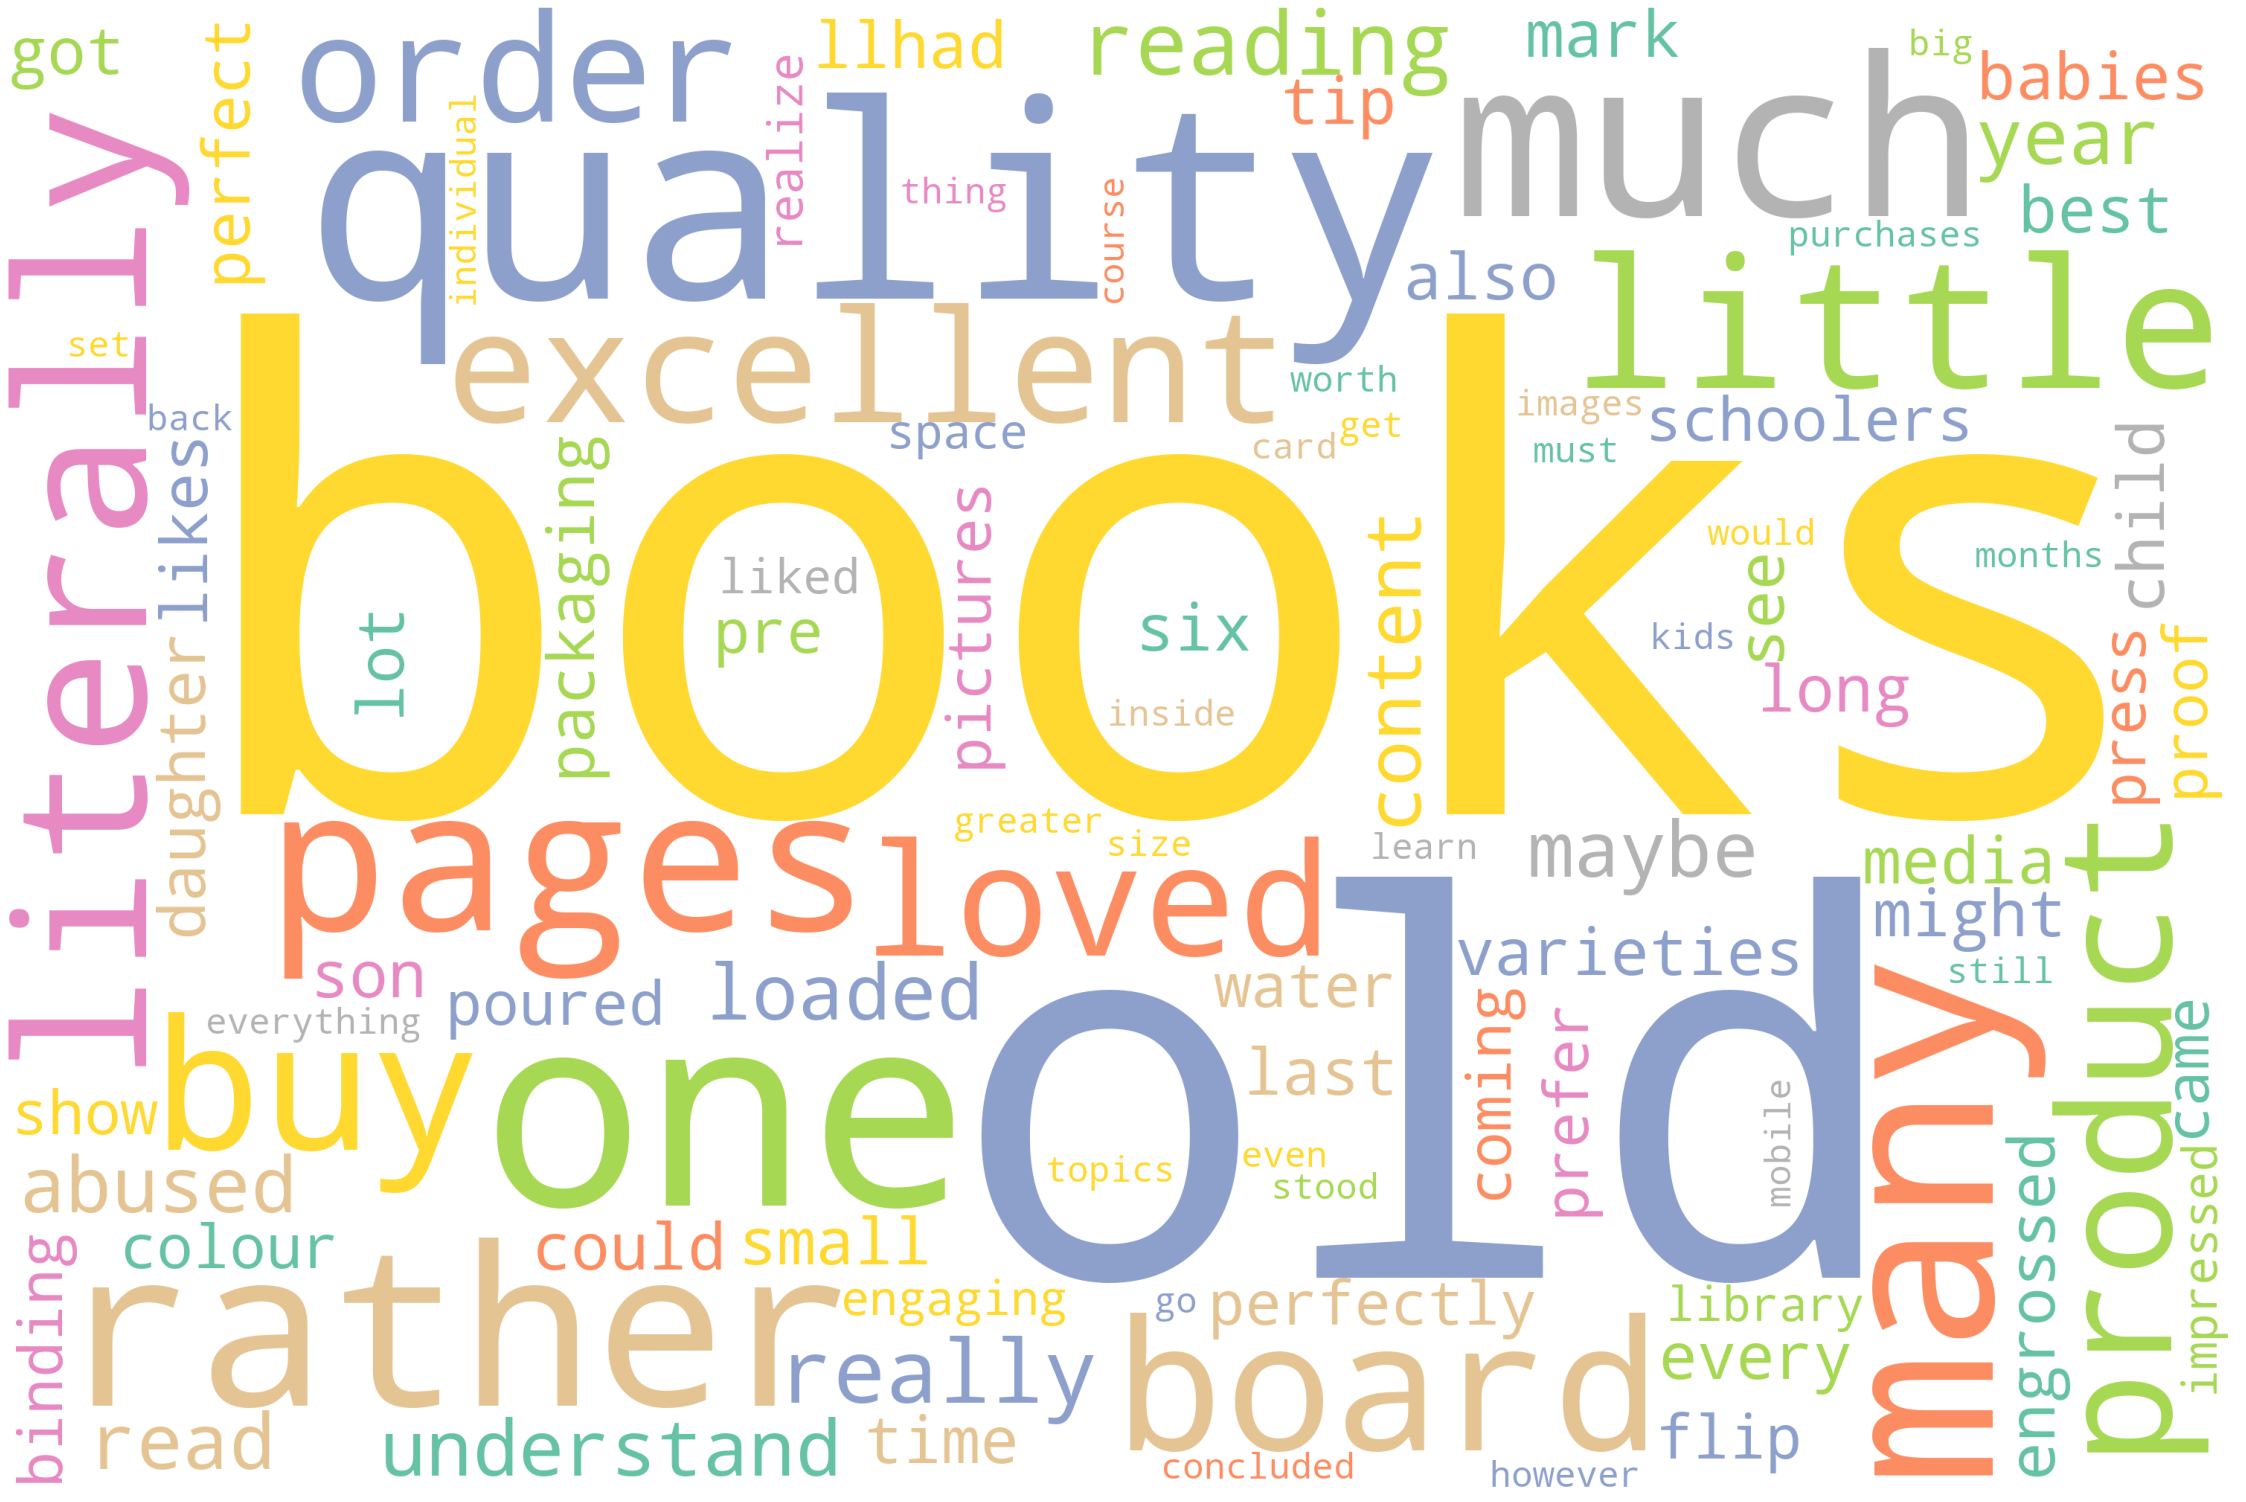

In [71]:
clean_reviews2=' '.join(tfidfv_ngram_max_features.get_feature_names())
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud
STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=my_stop_words).generate(clean_reviews2)
plot_cloud(wordcloud)

In [72]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [73]:
for token in doc_block[100:200]:
    print(token,token.pos_)

well INTJ
design NOUN
corner NOUN
keep VERB
round ADV
avoid VERB
accidental ADJ
hurt ADJ
baby NOUN
content NOUN
well INTJ
research NOUN
well INTJ
what DET
delivery NOUN
time NOUN
packaging NOUN
excellent PROPN
board PROPN
books PROPN
superb PROPN
quality PROPN
come PROPN
card NOUN
bird NOUN
box PROPN
10 NUM
book NOUN
nice ADJ
term NOUN
quality NOUN
colour NOUN
go VERB
baby NOUN
' PUNCT
love NOUN
' PUNCT
cute ADJ
collection NOUN
' PART
expexte PROPN
size NOUN
book NOUN
small ADJ
but CCONJ
still ADV
book INTJ
awesome ADJ
have VERB
12 NUM
leaflet NOUN
book NOUN
delivery NOUN
time NOUN
packaging PROPN
excellent PROPN
board PROPN
books PROPN
superb PROPN
quality PROPN
come PROPN
card NOUN
bird NOUN
box PROPN
10 NUM
book NOUN
nice ADJ
term NOUN
quality NOUN
colour NOUN
go VERB
baby NOUN
' PUNCT
love NOUN
' PUNCT
cute ADJ
collection NOUN
' PART
expexte PROPN
size NOUN
book NOUN
small ADJ
but CCONJ
still ADV
book INTJ
awesome ADJ
have VERB
12 NUM
leaflet NOUN
book NOUN
book NOUN
way PROPN
smal

In [74]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['load', 'set', 'thing', 'child', 'learn', 'get', 'page', 'book', 'wait', 'buy', 'book', 'child', 'month', 'thing', 'try', 'eat', 'book', '️', '️', '️', 'keep', 'box', '️', '️', 'research', 'book', 'conclude', 'get', 'amazon', 'color', 'get', 'feel', 'book', 'size', 'design', 'corner', 'keep', 'avoid', 'baby', 'content', 'research', 'delivery', 'time', 'packaging', 'card', 'bird', 'book', 'term', 'quality', 'colour', 'go', 'baby', 'love', 'collection', 'size', 'book', 'have', 'leaflet', 'book', 'book', 'child', 'learn', 'year', 'child', 'see', 'picture', 'order', 'understand', 'buy', 'book', 'thishope', 'find', 'medium', 'load', 'set', 'thing', 'child', 'learn', 'get', 'page', 'book', 'wait', 'buy', 'book', 'child', 'month', 'thing', 'try', 'eat', 'book', '️', '️', '️', 'keep', 'box', '️', '️', 'child', 'learn', 'year']


In [75]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

word  count
0     book   2039
1     baby    600
2    child    480
3      buy    480
4    month    480
5      get    360
6     size    360
7  content    360
8     love    360
9      son    360

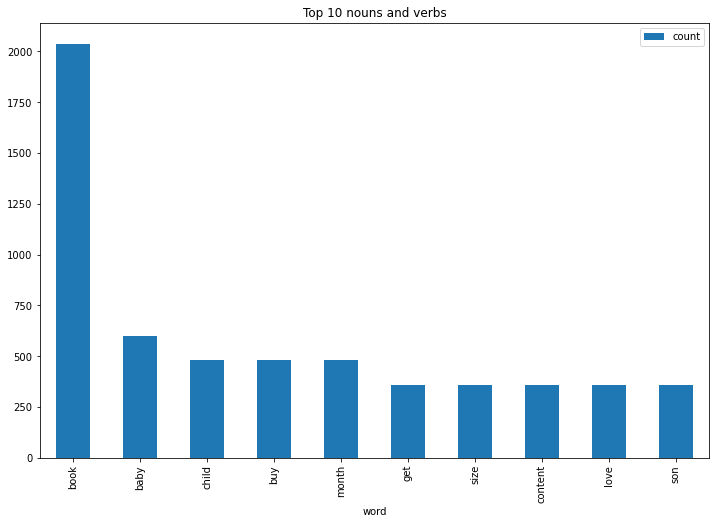

In [76]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [78]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences[0:100]

['I have well researched many books & concluded to this one.',
 'I got it for 399 from amazon.',
 'Colors are just perfect.',
 'You might get feeling that books are small in size.',
 'But if you carefully research , all board books are of this size.Books are very well designed.',
 'Corners are kept rounded to avoid accidental hurting to your baby.',
 'Content is well researched as well... What more!',
 'I have well researched many books & concluded to this one.',
 'I got it for 399 from amazon.',
 'Colors are just perfect.',
 'You might get feeling that books are small in size.',
 'But if you carefully research , all board books are of this size.Books are very well designed.',
 'Corners are kept rounded to avoid accidental hurting to your baby.',
 'Content is well researched as well... What more!',
 'I have well researched many books & concluded to this one.',
 'I got it for 399 from amazon.',
 'Colors are just perfect.',
 'You might get feeling that books are small in size.',
 'But if

In [79]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df


sentence
0     I have well researched many books & concluded ...
1                         I got it for 399 from amazon.
2                              Colors are just perfect.
3     You might get feeling that books are small in ...
4     But if you carefully research , all board book...
...                                                 ...
4693  They will develop the back of glancing or read...
4694                               Can't be more happy.
4695  One of the best purchases If you are reading t...
4696               It is so engaging for little babies.
4697  With its small size, babies can hold it perfec...

[4698 rows x 1 columns]

In [81]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [82]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [83]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [84]:
# manual testing
calculate_sentiment(text='great')

3

In [85]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       0
1       0
2       3
3       0
4       2
       ..
4693    0
4694    3
4695    5
4696    1
4697    3
Name: sentiment_value, Length: 4698, dtype: int64

In [86]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       11
1        7
2        4
3       10
4       17
        ..
4693    12
4694     4
4695    21
4696     7
4697    25
Name: word_count, Length: 4698, dtype: int64

In [87]:
sent_df.sort_values(by='sentiment_value')

sentence  sentiment_value  \
783   Corners are kept rounded to avoid accidental h...               -5   
686   Corners are kept rounded to avoid accidental h...               -5   
1867  Corners are kept rounded to avoid accidental h...               -5   
4073  Corners are kept rounded to avoid accidental h...               -5   
1714  Corners are kept rounded to avoid accidental h...               -5   
...                                                 ...              ...   
632   One of the best purchases Delivery was on time...               19   
2941  One of the best purchases Delivery was on time...               19   
3816  One of the best purchases Delivery was on time...               19   
4039  One of the best purchases Delivery was on time...               19   
483   One of the best purchases Delivery was on time...               19   

      word_count  
783           11  
686           11  
1867          11  
4073          11  
1714          11  
...          ...  
632           67  
2941          67  
3816          67  
4039          67  
483           67  

[4698 rows x 3 columns]

In [88]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    4698.000000
mean        1.787995
std         3.106129
min        -5.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        19.000000
Name: sentiment_value, dtype: float64

In [89]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

sentence  sentiment_value  \
0     I have well researched many books & concluded ...                0   
1                         I got it for 399 from amazon.                0   
3     You might get feeling that books are small in ...                0   
5     Corners are kept rounded to avoid accidental h...               -5   
6      Content is well researched as well... What more!                0   
...                                                 ...              ...   
4687  My son has chewed, poured water, stood on them...                0   
4689  The books seem water resistant if not water pr...                0   
4691    My son has learnt a lot in the last six months.                0   
4692  One tip is to read the books to your kids atle...                0   
4693  They will develop the back of glancing or read...                0   

      word_count  
0             11  
1              7  
3             10  
5             11  
6              8  
...          ...  
4687          18  
4689           9  
4691          11  
4692          17  
4693          12  

[2168 rows x 3 columns]

In [90]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

sentence  sentiment_value  \
2                              Colors are just perfect.                3   
4     But if you carefully research , all board book...                2   
9                              Colors are just perfect.                3   
11    But if you carefully research , all board book...                2   
16                             Colors are just perfect.                3   
...                                                 ...              ...   
4690  Coming to the content, they are clear and vibr...                4   
4694                               Can't be more happy.                3   
4695  One of the best purchases If you are reading t...                5   
4696               It is so engaging for little babies.                1   
4697  With its small size, babies can hold it perfec...                3   

      word_count  
2              4  
4             17  
9              4  
11            17  
16             4  
...          ...  
4690           9  
4694           4  
4695          21  
4696           7  
4697          25  

[2530 rows x 3 columns]

In [91]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

sentence  sentiment_value  \
0     I have well researched many books & concluded ...                0   
1                         I got it for 399 from amazon.                0   
2                              Colors are just perfect.                3   
3     You might get feeling that books are small in ...                0   
4     But if you carefully research , all board book...                2   
...                                                 ...              ...   
4693  They will develop the back of glancing or read...                0   
4694                               Can't be more happy.                3   
4695  One of the best purchases If you are reading t...                5   
4696               It is so engaging for little babies.                1   
4697  With its small size, babies can hold it perfec...                3   

      word_count  index  
0             11      0  
1              7      1  
2              4      2  
3             10      3  
4             17      4  
...          ...    ...  
4693          12   4693  
4694           4   4694  
4695          21   4695  
4696           7   4696  
4697          25   4697  

[4698 rows x 4 columns]

C:\Users\harsh\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

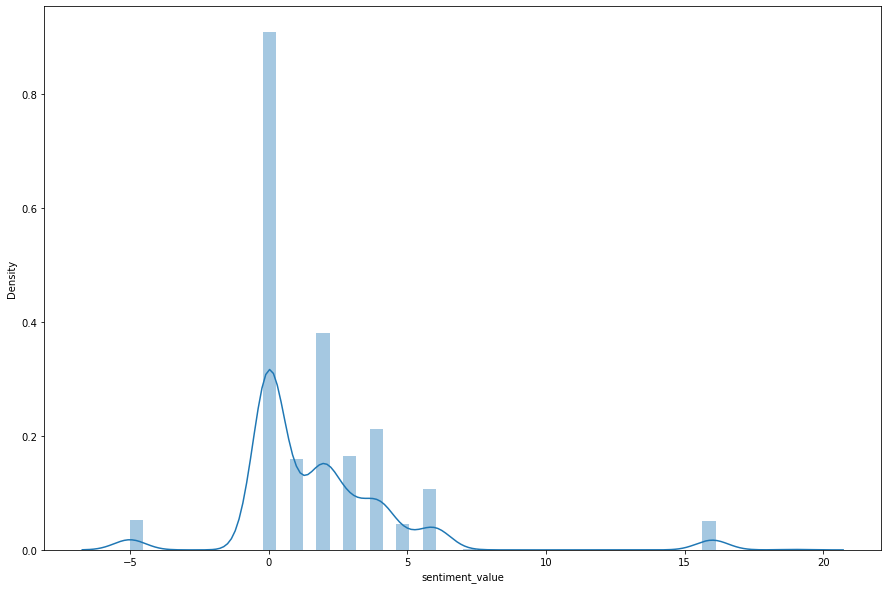

In [92]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

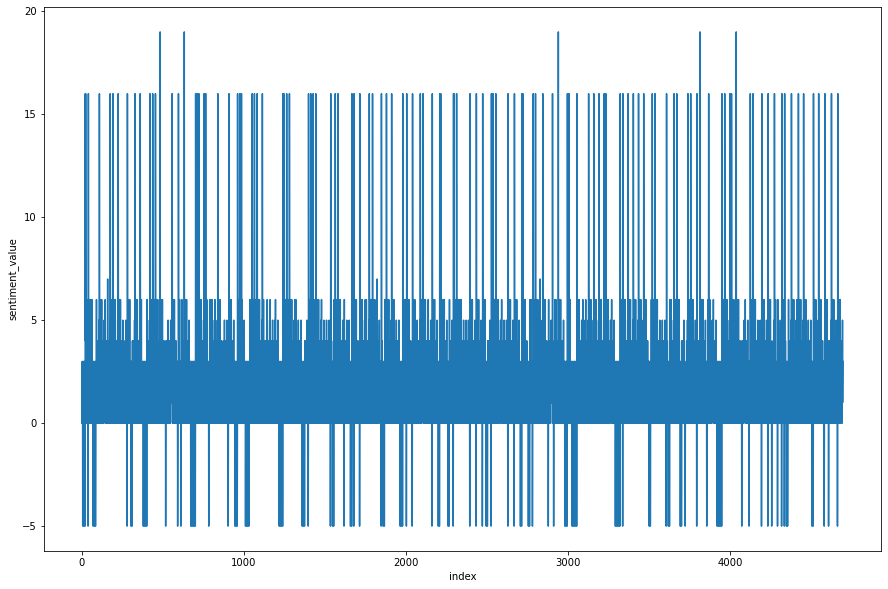

In [93]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

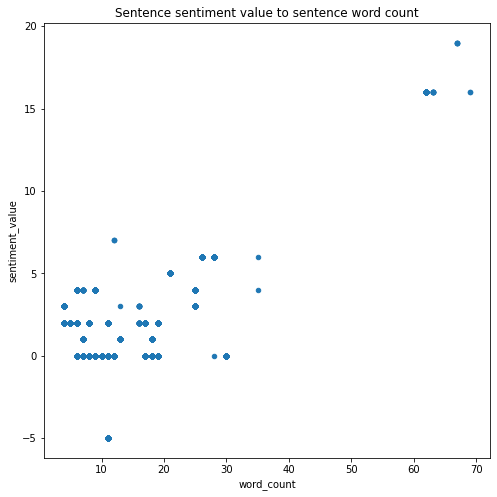

In [94]:
# Correlation analysis
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')